<a href="https://colab.research.google.com/github/yagyambaggarwal/Bird-call-/blob/main/99_BirdSoundCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Starting the work on Google Colab, I have  first installed kaggle.json on colab followed by installing and unzipping the dataset.**

In [ ]:
pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivanshaggarwal","key":"c477b278e25ad09f37bf074ef0fbf09f"}'}

In [ ]:
mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                         Chocolate Sales                                    468320  2026-01-04 14:23:35.490000          18519        330  1.0              
ashrafkhetran/the-movies-database-tmdb-1950-2025            The Movies database (TMDB) 1950-2025                 4897  2026-02-09 05:35:40.533000           1027         26  1.0              
aliiihussain/amazon-sales-dataset                           Amazon_Sales_Dataset                              1297759  2026-02-01 11:37:12.353000           4246         79  1.0              
sadiajavedd/housing-prices                   

In [ ]:
# !kaggle datasets download -d ttahara/birdsong-resampled-train-audio-00
!kaggle datasets download -d ttahara/birdsong-resampled-train-audio-00 -q



Dataset URL: https://www.kaggle.com/datasets/ttahara/birdsong-resampled-train-audio-00
License(s): other
^C


In [ ]:
!ls


kaggle.json  sample_data


In [ ]:
!dir

kaggle.json  sample_data


In [ ]:
!unzip birdsong-resampled-train-audio-00.zip

unzip:  cannot find or open birdsong-resampled-train-audio-00.zip, birdsong-resampled-train-audio-00.zip.zip or birdsong-resampled-train-audio-00.zip.ZIP.


In [ ]:
! dir

aldfly	annhum				       bkbcuc	boboli	buffle
ameavo	astfly				       bkbmag1	bongul	buggna
amebit	baisan				       bkbwar	brdowl	buhvir
amecro	baleag				       bkcchi	brebla	bulori
amegfi	balori				       bkchum	brespa	bushti
amekes	banswa				       bkhgro	brncre	buwtea
amepip	barswa				       bkpwar	brnthr	buwwar
amered	bawwar				       bktspa	brthum	kaggle.json
amerob	belkin1				       blkpho	brwhaw	sample_data
amewig	belspa2				       blugrb1	btbwar	train_mod_1.csv
amewoo	bewwre				       blujay	btnwar	train_mod.csv
amtspa	birdsong-resampled-train-audio-00.zip  bnhcow	btywar


In [ ]:
 ! pip install librosa
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
import itertools
from tqdm import tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Now using Librosa and Matplotlib, we will plot some wave files from our sample dataset...**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# **I have taken random wave file from the dataset and using librosa nd Ipython I am trying to plot it as a graph and figure out its sample rate.**

In [ ]:
filename = 'aldfly/XC134874.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

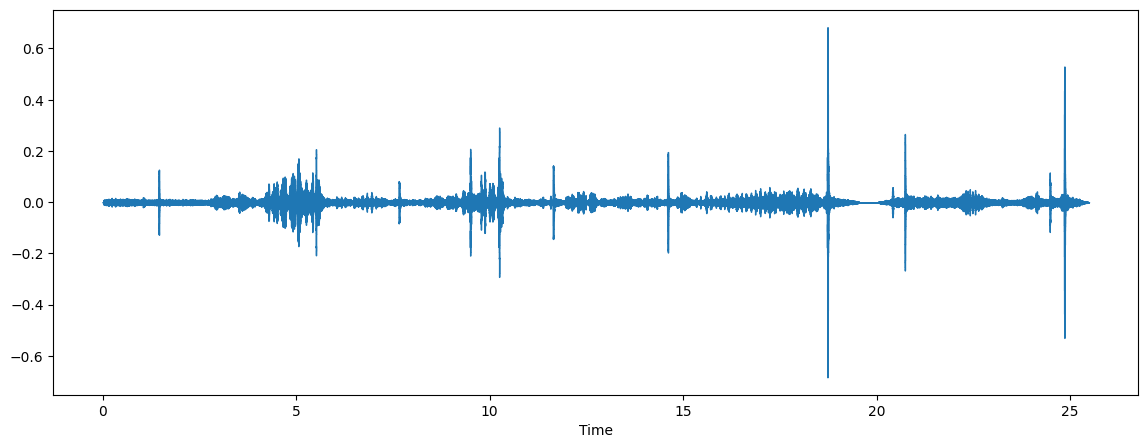

In [ ]:
 #1st sound aldfly
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

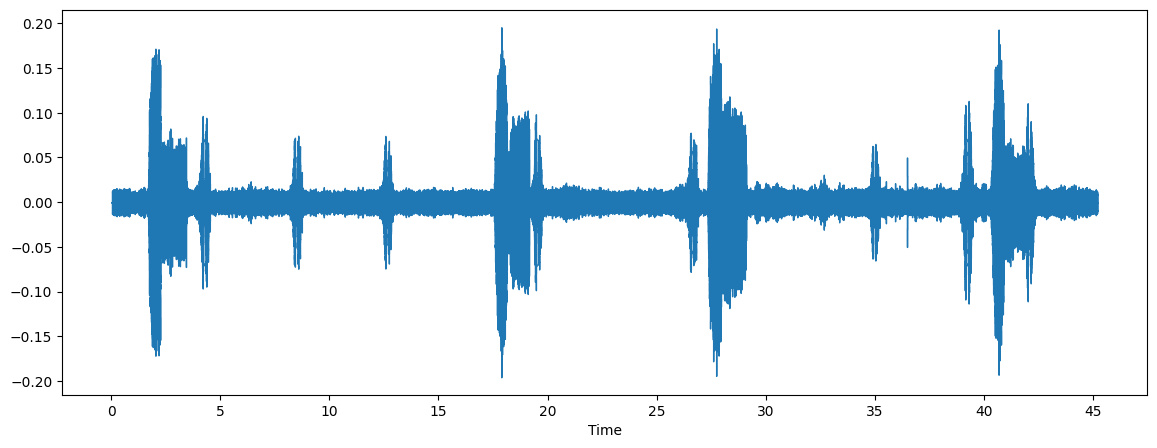

In [ ]:
#last sound of buwwar
filename1 = 'buwwar/XC78891.wav'
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename1)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename1)


In [ ]:
sample_rate

22050

In [ ]:
data

array([ 2.11238159e-07, -4.51229852e-07,  7.59202294e-07, ...,
        1.28172815e-08,  6.14315070e-08,  0.00000000e+00], dtype=float32)

## **Further on Pandas help me to read the metadata.**

In [ ]:
import pandas as pd

metadata = pd.read_csv('/content/train_mod_1.csv')
metadata.head()

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
2     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
3     3.5            no     aldfly  2 (stereo)  2013-05-27           both   
4     4.0            no     aldfly  2 (stereo)  2013-05-27           both   

   duration      filename          speed           species  ... Unnamed: 39  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher  ...       32000   
1        36  XC135454.mp3           both  Alder Flycatcher  ...         NaN   
2        39  XC135455.mp3           both  Alder Flycatcher  ...         NaN   
3        33  XC135456.mp3           both  Alder Flycatcher  ...         NaN   
4        36  XC135457.mp3          level  Alder Flycatcher  ...         NaN   

    Unnamed: 40 Unnamed: 41 Unnamed: 42 Unnamed: 43 Unnamed: 44 Unnamed: 45  \
0  XC134874.wav    1 (mono)         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN         NaN   
2           NaN         NaN         NaN         NaN         NaN         NaN   
3           NaN         NaN         NaN         NaN         NaN         NaN   
4           NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 46 Unnamed: 47 Unnamed: 48  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  

[5 rows x 49 columns]

In [ ]:
metadata['species'].value_counts()

American Redstart          203
Baltimore Oriole           157
Buff-bellied Pipit         154
American Bittern           147
American Crow              147
American Goldfinch         147
American Kestrel           147
American Robin             147
Baird's Sandpiper          147
Bald Eagle                 147
American Wigeon            140
Alder Flycatcher           131
Anna's Hummingbird         105
American Avocet             98
American Tree Sparrow       69
Ash-throated Flycatcher     39
Name: species, dtype: int64

In [ ]:
metadata['species'].count()

2125

## **Now i will create MFCCS to further help me with my ANN model. For this I am traversing my csv file, extracting out the name of each individual wave file from data set and storing their respective MFFCS in new csv file "extracted_features"**

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=30,n_fft=2048, hop_length=512)
print(mfccs.shape)

(30, 1949)


In [ ]:
#testing mfcc for single audio file
mfccs

array([[-5.7011615e+02, -4.3628857e+02, -4.0404135e+02, ...,
        -4.0504297e+02, -4.0927884e+02, -4.6026773e+02],
       [-5.8342930e+01, -6.9075607e+01, -7.6081642e+01, ...,
        -8.3282837e+01, -7.5091248e+01, -6.4638481e+01],
       [-2.6245256e+01, -3.3151855e+01, -3.6660450e+01, ...,
        -5.1416298e+01, -3.8644012e+01, -2.5007456e+01],
       ...,
       [ 4.3121819e+00,  6.1825836e-01,  3.5548747e-01, ...,
        -3.8239262e-01,  2.8332853e-01, -4.7993741e+00],
       [-1.0912971e+00,  2.9860973e-01,  2.4234979e+00, ...,
        -4.0249214e-01,  1.6239488e+00, -2.1614180e+00],
       [-7.4559689e+00, -4.5316067e+00, -2.4370046e+00, ...,
        -8.7761557e-01, -1.3152013e+00, -1.8432509e+00]], dtype=float32)

In [ ]:
#testing mfcc for every audio file
import os
audio_dataset_path = '/content'
metadata = pd.read_csv('/content/train_mod_1.csv')
metadata.head()

rating playback_used ebird_code    channels        date          pitch  \
0     3.5            no     aldfly    1 (mono)  2013-05-25  Not specified   
1     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
2     4.0            no     aldfly  2 (stereo)  2013-05-27           both   
3     3.5            no     aldfly  2 (stereo)  2013-05-27           both   
4     4.0            no     aldfly  2 (stereo)  2013-05-27           both   

   duration      filename          speed           species  ... Unnamed: 39  \
0        25  XC134874.mp3  Not specified  Alder Flycatcher  ...       32000   
1        36  XC135454.mp3           both  Alder Flycatcher  ...         NaN   
2        39  XC135455.mp3           both  Alder Flycatcher  ...         NaN   
3        33  XC135456.mp3           both  Alder Flycatcher  ...         NaN   
4        36  XC135457.mp3          level  Alder Flycatcher  ...         NaN   

    Unnamed: 40 Unnamed: 41 Unnamed: 42 Unnamed: 43 Unnamed: 44 Unnamed: 45  \
0  XC134874.wav    1 (mono)         NaN         NaN         NaN         NaN   
1           NaN         NaN         NaN         NaN         NaN         NaN   
2           NaN         NaN         NaN         NaN         NaN         NaN   
3           NaN         NaN         NaN         NaN         NaN         NaN   
4           NaN         NaN         NaN         NaN         NaN         NaN   

  Unnamed: 46 Unnamed: 47 Unnamed: 48  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  

[5 rows x 49 columns]

In [ ]:
metadata['species'].value_counts()

American Redstart          203
Baltimore Oriole           157
Buff-bellied Pipit         154
American Bittern           147
American Crow              147
American Goldfinch         147
American Kestrel           147
American Robin             147
Baird's Sandpiper          147
Bald Eagle                 147
American Wigeon            140
Alder Flycatcher           131
Anna's Hummingbird         105
American Avocet             98
American Tree Sparrow       69
Ash-throated Flycatcher     39
Name: species, dtype: int64

In [ ]:
import pandas as pd

# group the data by the label column
grouped = metadata.groupby('species')

# create an empty DataFrame to store the selected rows
new_df = pd.DataFrame()

# iterate over each group and select the first 25 rows
for label, group in grouped:
    selected_rows = group.head(100)
    new_df = pd.concat([new_df, selected_rows])

# reset the index of the new DataFrame
new_df = new_df.reset_index(drop=True)


In [ ]:
new_df['species'].value_counts()

Alder Flycatcher           100
American Bittern           100
American Crow              100
American Goldfinch         100
American Kestrel           100
American Redstart          100
American Robin             100
American Wigeon            100
Anna's Hummingbird         100
Baird's Sandpiper          100
Bald Eagle                 100
Baltimore Oriole           100
Buff-bellied Pipit         100
American Avocet             98
American Tree Sparrow       69
Ash-throated Flycatcher     39
Name: species, dtype: int64

In [ ]:
metadata = new_df
metadata['species'].value_counts()

Alder Flycatcher           100
American Bittern           100
American Crow              100
American Goldfinch         100
American Kestrel           100
American Redstart          100
American Robin             100
American Wigeon            100
Anna's Hummingbird         100
Baird's Sandpiper          100
Bald Eagle                 100
Baltimore Oriole           100
Buff-bellied Pipit         100
American Avocet             98
American Tree Sparrow       69
Ash-throated Flycatcher     39
Name: species, dtype: int64

In [ ]:
def feature_extractor(file):
  # audio,sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  audio, sample_rate = librosa.load(file_name, sr=22050)
  mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40,n_fft=2048, hop_length=512)
  mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

  return mfccs_scaled_features

In [ ]:
import numpy as np
import itertools
from tqdm import tqdm

#Iterating through every audio file and extracting features using MFCC

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
  if(row['ebird_code']=='cacwre'):
    break
  else:
    fn = row['filename'].split('.')
    fn = fn[0]
  # print(fn)
    newfn = fn+str('.wav')
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["ebird_code"])+'/',newfn)
    final_class_labels=row['species']
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1506it [04:39,  5.39it/s]


In [ ]:

 #converting extracted_features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','species'])
extracted_features_df.head()

feature           species
0  [-400.03525, -48.634632, -70.15694, 17.095514,...  Alder Flycatcher
1  [-288.97586, 52.560593, -21.558172, 25.732237,...  Alder Flycatcher
2  [-282.941, 33.79621, -19.292204, 33.1278, -8.1...  Alder Flycatcher
3  [-289.5469, 46.926296, -16.201942, 29.51346, -...  Alder Flycatcher
4  [-229.33372, 82.66302, -18.38279, 5.103863, -4...  Alder Flycatcher

In [ ]:
#Split the dataset into independent and dependent dataset
x = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['species'].tolist())

In [ ]:
x.shape

(1506, 40)

In [ ]:
y.reshape(-1).shape

(1506,)

In [ ]:
# y=np.array(pd.get_dummies(y))
# using label_encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y.shape

(1506, 16)

## **Finally, before making ANN model I train test split the dataset into test and train dataset. Then using Tensorflow and Keras I create ANN model and test my dataset**

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:

y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
x_train.shape

(1204, 40)

In [ ]:
x_train

array([[-4.0185397e+02,  4.8673367e+01,  1.5532679e+01, ...,
         3.0388186e+00, -7.4570101e-01,  2.5953982e+00],
       [-2.9329181e+02,  4.5600323e+01,  6.1920013e+00, ...,
         8.5261536e-01, -2.2132666e+00,  8.8369817e-01],
       [-4.1368936e+02,  1.3249892e+02, -4.7956116e+01, ...,
        -7.3139125e-01, -9.0241808e-01,  1.1052519e+00],
       ...,
       [-3.4707999e+02,  1.3872851e+01, -5.9203152e+01, ...,
         1.2410027e+00, -2.3704789e+00,  8.1075335e-01],
       [-2.0229390e+02, -9.7549467e+00, -3.3636220e+00, ...,
        -1.5325211e+00,  1.7284898e+00,  1.0412670e-01],
       [-4.5248001e+02,  8.8937141e+01, -9.6186495e-01, ...,
         4.1354842e+00,  3.3051972e+00,  4.3883920e+00]], dtype=float32)

In [ ]:
x_test.shape

(302, 40)

In [ ]:
y_train.shape

(1204, 16)

In [ ]:
y_test.shape

(302, 16)

In [ ]:
#Creating ANN Model

import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
#No of species

num_labels = y.shape[1]

In [ ]:
model=Sequential()
#1st layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
#2nd layer
model.add(Dense(200))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
# 3rd layer
# model.add(Dense(100))
# model.add(Activation('relu'))
# # model.add(Dropout(0.2))
# final
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                3216      
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
Total params: 27,516
Trainable params: 27,516
Non-traina

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history= model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
27/38 [====================>.........] - ETA: 0s - loss: 15.1359 - accuracy: 0.1238
Epoch 1: val_loss improved from inf to 3.82317, saving model to saved_models/audio_classification.hdf5
38/38 [==============================] - 2s 19ms/step - loss: 12.3158 - accuracy: 0.1329 - val_loss: 3.8232 - val_accuracy: 0.2550
Epoch 2/100
25/38 [==================>...........] - ETA: 0s - loss: 3.4278 - accuracy: 0.2288
Epoch 2: val_loss improved from 3.82317 to 2.62388, saving model to saved_models/audio_classification.hdf5
38/38 [==============================] - 0s 4ms/step - loss: 3.1818 - accuracy: 0.2492 - val_loss: 2.6239 - val_accuracy: 0.2616
Epoch 3/100
23/38 [=================>............] - ETA: 0s - loss: 2.3674 - accuracy: 0.3628
Epoch 3: val_loss improved from 2.62388 to 2.14268, saving model to saved_models/audio_classification.hdf5
38/38 [==============================] - 0s 4ms/step - loss: 2.2038 - accuracy: 0.3837 - val_loss: 2.1427 - val_accuracy: 0.3940
Epoch 4/

## **I complete all the iterations in 23 seconds with my ANN model showing accuracy of about 99% on the test dataset**

In [ ]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)

print(test_accuracy[1])

0.9933775067329407


In [ ]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9934


[0.018036434426903725, 0.9933775067329407]

In [ ]:
x_test[1]

array([-2.7258728e+02,  1.0734582e+02, -3.6557267e+00,  3.3053440e+01,
        3.7519281e+00,  1.9786509e+01,  1.6306285e+00,  2.1439507e+01,
        6.4610815e+00,  1.2342118e+01,  1.3934495e+00,  7.6025343e+00,
        1.7100022e+00,  5.5643253e+00,  5.8982939e-01,  6.1119680e+00,
        1.6011484e+00,  4.4039383e+00,  4.4581395e-01,  3.2457409e+00,
       -1.8145354e+00,  3.2344813e+00, -1.4155022e+00,  1.6477113e+00,
       -7.3711067e-01,  1.6370560e+00, -2.0968895e+00,  2.1519759e+00,
       -1.2641277e+00,  1.2097471e+00, -1.6548538e+00,  9.5379800e-01,
       -6.9986922e-01, -1.5762426e-01, -1.7900554e+00,  7.6264089e-01,
       -2.5255785e+00, -1.0345337e-01, -2.7514508e+00, -2.0744133e-01],
      dtype=float32)

**To Test the model**
*  Preprocess the test audio
*  predict the classes
*  inverse transform your Predicted label

In [ ]:
filename = '/content/buffle/XC152601.wav'
audio, sample_rate = librosa.load(file_name, sr=22050)
# mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40,n_fft=2048, hop_length=512)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features.shape)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features),axis=1)
prediction_class = labelencoder.inverse_transform(predicted_label)
print(prediction_class)

(40,)
(1, 40)
1/1 [==============================] - 0s 30ms/step
['Buff-bellied Pipit']


In [ ]:

model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9934


[0.018036434426903725, 0.9933775067329407]

In [ ]:
y_pred = model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


## **Plotting the results of ANN model usling matplotlib into two graphs namely "Accuracy Eval" showing train dataset accuracy vs test dataset accuracy and "Error Eval" showing train dataset error vs test dataset error.**

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

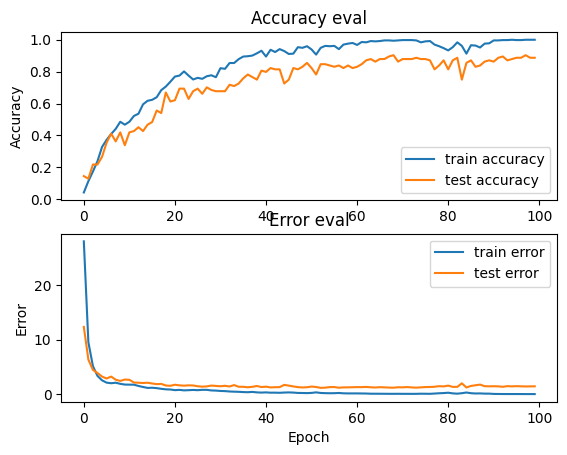

In [ ]:
plot_history(history)

In [ ]:
print(x)

[[-4.0003525e+02 -4.8634632e+01 -7.0156937e+01 ...  2.1439741e+00
  -1.5398643e+00  1.2377557e+00]
 [-2.8897586e+02  5.2560593e+01 -2.1558172e+01 ...  2.1514990e+00
   7.2636473e-01  2.5954776e+00]
 [-2.8294101e+02  3.3796211e+01 -1.9292204e+01 ...  2.1488853e+00
   3.6449707e-01  2.8454823e+00]
 ...
 [-3.5769958e+02 -3.7453606e+00 -8.1903831e+01 ... -6.5288496e-01
  -3.2612362e+00 -2.2241981e+00]
 [-3.1785257e+02  3.8509151e+01 -4.9495152e+01 ... -2.7233532e-01
  -3.7764590e+00 -3.2449653e-03]
 [-3.6003238e+02 -4.9460289e+01 -7.6513100e+01 ... -1.5832342e+00
  -2.1317343e-01 -9.6351862e-01]]
